# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

## ⚠️ AI-Generated Notebook - Use with Caution ⚠️

This notebook was generated by an AI assistant and has not been fully verified. The code may contain errors or inaccuracies. Please review and validate the analysis results carefully before drawing any conclusions.

## Overview

This Dandiset contains data from the Allen Institute's Openscope project focused on "Temporal Barcoding" in visual neurons. The experiment recorded neural responses to white noise visual stimuli that were repeatedly presented, resulting in spike rasters that look remarkably like "bar codes". These characteristic temporal response patterns may serve as identifiers of discrete cell types across different animals and even species.

**Dandiset Link**: [https://dandiarchive.org/dandiset/000563/0.250311.2145](https://dandiarchive.org/dandiset/000563/0.250311.2145)

## Dataset Description

Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. This experiment used the OpenScope Neuropixels passive viewing protocol and displayed visual stimuli modulated in time by a short, repeated white noise sequence. The visual stimulus was either a spatially uniform field whose luminance was modulated in time (Full Field Flicker), or a standing sinusoidal grating whose contrast was modulated in time (Static Gratings).

## What We'll Explore

In this notebook, we will:

1. Connect to the DANDI archive and load the Dandiset
2. Explore the structure and metadata of the NWB files
3. Examine the extracellular electrophysiology data (spike times and waveforms)
4. Visualize responses of neurons to the visual stimuli
5. Look for evidence of the "barcode" patterns in neural responses

## Required Packages

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import islice
import h5py
import remfile

# DANDI API packages
from dandi.dandiapi import DandiAPIClient

# PyNWB for working with NWB files
import pynwb

# Setting plotting style
sns.set_theme()

## Connecting to the DANDI Archive

First, let's connect to the DANDI archive and get some basic information about the Dandiset:

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000563", "0.250311.2145")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:500]}...")  # Showing just the beginning

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145
Description: Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. Responses to white noise stimulation are useful for a variety of analyses, including information theoretic measures and generative models of precise spike timing. However the literature was lacking data on responses to white noise in cortical visual areas, or in the visual stream flowing through the superior colliculus.

This ...


## Exploring the Assets in the Dandiset

Let's list some of the assets in this Dandiset to understand its structure:

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")


First 5 assets:
- sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb (ID: 55148cf3-9d15-4d05-a190-4a73e007e48d)
- sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb (ID: 1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1)
- sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb (ID: 6e4d0047-ca6b-4d29-b150-bc9e2c445646)
- sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb (ID: 54cef618-72de-4c69-b441-8bd5e26049c5)
- sub-699241/sub-699241_ses-1318772854_ogen.nwb (ID: c3bbf094-904e-43b7-83d5-be5a8bf3826f)


The assets show that each subject (mouse) has multiple NWB files, with each file containing data from a different probe or the optogenetics stimulation data.

## Loading and Examining an NWB File

Let's load one of the NWB files to explore its contents. We'll select the probe-0 ecephys file from subject 681446.

In [4]:
# Define the URL for the NWB file we want to examine
asset_id = "1f158fe0-f8ef-495e-b031-da25316a335c"  # This is the ID for sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb
nwb_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Open the file using remfile for remote access
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print(f"Session ID: {nwb.session_id}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age: {nwb.subject.age}")
print(f"Subject species: {nwb.subject.species}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session ID: 1290510496
Session description: LFP data and associated info for one probe
Session start time: 2023-08-16 00:00:00-07:00
Subject ID: 681446
Subject age: P112D
Subject species: Mus musculus


## File Structure and Contents

Let's explore the structure of the NWB file to understand what data is available:

In [5]:
# Check what data is available in this NWB file
print("Available acquisition data:")
for key in nwb.acquisition.keys():
    print(f"- {key}")

# Check if there are any processed data
if hasattr(nwb, 'processing') and nwb.processing:
    print("\nAvailable processing modules:")
    for module_name in nwb.processing.keys():
        print(f"- {module_name}")

# Check if there are units (sorted spikes)
if hasattr(nwb, 'units') and nwb.units is not None:
    print(f"\nNumber of units (neurons): {len(nwb.units.id)}")

Available acquisition data:
- probe_0_lfp
- probe_0_lfp_data


## LFP Data Overview

This file contains Local Field Potential (LFP) data. Let's examine the structure of the LFP data:

In [6]:
# Get the LFP data object
probe_lfp = nwb.acquisition['probe_0_lfp']
lfp_series = probe_lfp.electrical_series['probe_0_lfp_data']

# Print information about the LFP data
print(f"LFP data shape: {lfp_series.data.shape}")
print(f"LFP data unit: {lfp_series.unit}")
print(f"Number of electrodes: {lfp_series.data.shape[1]}")
print(f"Number of timepoints: {lfp_series.data.shape[0]}")
print(f"Timestamps unit: {lfp_series.timestamps_unit}")

# Get information about the electrodes
electrodes_table = lfp_series.electrodes.table
print(f"\nElectrode table has {len(electrodes_table.id)} rows and columns: {electrodes_table.colnames}")

# Convert a small part of the electrode table to a DataFrame for viewing
electrodes_df = electrodes_table.to_dataframe().head()
print("\nSample of electrodes data:")
print(electrodes_df[['location', 'group_name', 'x', 'y', 'z']].head())

LFP data shape: (10168076, 73)
LFP data unit: volts
Number of electrodes: 73
Number of timepoints: 10168076
Timestamps unit: seconds

Electrode table has 73 rows and columns: ('location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering')

Sample of electrodes data:
   location group_name       x       y       z
id                                            
2       APN     probeA  8064.0  3068.0  7299.0
6       APN     probeA  8056.0  3032.0  7305.0
10      APN     probeA  8049.0  2996.0  7312.0
14      APN     probeA  8040.0  2952.0  7320.0
18      APN     probeA  8032.0  2916.0  7326.0


## Examining the Units (Sorted Neurons)

Now, let's examine information about the sorted neurons (units) in this file:

In [7]:
# Create a DataFrame of units for easier analysis
units_df = nwb.units.to_dataframe()

# Display summary statistics
print(f"Total units: {len(units_df)}")
print("\nQuality metrics:")
print(units_df[['quality', 'isolation_distance', 'presence_ratio', 'firing_rate']].describe())

# Look at the distribution of firing rates
plt.figure(figsize=(10, 6))
sns.histplot(units_df['firing_rate'].dropna(), bins=30)
plt.title('Distribution of Firing Rates')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

AttributeError: 'NoneType' object has no attribute 'to_dataframe'

## Visualizing Spike Times

Let's visualize the spike times for a few units:

In [8]:
# Select a few units to visualize
sample_units = units_df.sample(min(5, len(units_df)))

plt.figure(figsize=(15, 8))
for i, (idx, unit) in enumerate(sample_units.iterrows()):
    spike_times = units_df.at[idx, 'spike_times']
    if spike_times is not None and len(spike_times) > 0:
        plt.scatter(spike_times, np.ones_like(spike_times) * i, marker='|', s=5, color=f'C{i}')
        
plt.yticks(range(len(sample_units)), [f"Unit {idx}" for idx in sample_units.index])
plt.xlabel('Time (seconds)')
plt.title('Spike Times for Sample Units')
plt.xlim(0, 60)  # Show first 60 seconds
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

NameError: name 'units_df' is not defined

## Visualizing Waveforms

Let's also look at the average waveforms for a few units:

In [9]:
# Select a few units to visualize waveforms
sample_units = units_df.sample(min(4, len(units_df)))

plt.figure(figsize=(15, 8))
for i, (idx, unit) in enumerate(sample_units.iterrows()):
    waveform = units_df.at[idx, 'waveform_mean']
    if waveform is not None and len(waveform) > 0:
        plt.subplot(2, 2, i+1)
        plt.plot(waveform)
        plt.title(f"Unit {idx} Waveform")
        plt.xlabel('Sample')
        plt.ylabel('Amplitude (V)')
        plt.grid(True)
        
plt.tight_layout()
plt.show()

NameError: name 'units_df' is not defined

## Loading a Different NWB File with Stimulus Information

To explore the "barcode" patterns in neural responses, we need to correlate spike times with stimulus presentations. Let's load the optogenetics (ogen) file which contains stimulus information:

In [10]:
# Define the URL for the ogen NWB file from the same subject
ogen_asset_id = "2f2ac304-83a3-4352-8612-5f34b68062a0"  # This is the ID for sub-681446/sub-681446_ses-1290510496_ogen.nwb
ogen_url = f"https://api.dandiarchive.org/api/assets/{ogen_asset_id}/download/"

# Open the file using remfile for remote access
ogen_remote_file = remfile.File(ogen_url)
ogen_h5_file = h5py.File(ogen_remote_file)
ogen_io = pynwb.NWBHDF5IO(file=ogen_h5_file)
ogen_nwb = ogen_io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Examining Stimulus Presentation Information

The "barcoding" concept is related to how neurons respond to repeated presentations of the same stimulus. Let's examine the stimulus presentation information:

In [11]:
# Get information about stimulus presentations
if hasattr(ogen_nwb, 'intervals') and 'RepeatFFF_presentations' in ogen_nwb.intervals:
    repeat_stim = ogen_nwb.intervals['RepeatFFF_presentations']
    
    # Convert to DataFrame for easier analysis
    repeat_stim_df = repeat_stim.to_dataframe()
    
    print(f"Number of 'RepeatFFF' stimulus presentations: {len(repeat_stim_df)}")
    print(f"Columns in the stimulus dataframe: {repeat_stim_df.columns.tolist()}")
    
    # Print some examples
    print("\nSample of stimulus presentations:")
    print(repeat_stim_df[['start_time', 'stop_time', 'stimulus_name', 'contrast']].head())
    
    # Get information about stimulus blocks and repeats
    print(f"\nNumber of unique stimulus blocks: {repeat_stim_df['stimulus_block'].nunique()}")
    print(f"Range of index_repeat values: {repeat_stim_df['index_repeat'].min()} to {repeat_stim_df['index_repeat'].max()}")
else:
    print("No 'RepeatFFF_presentations' found in the file.")
    
# Check for other stimulus presentations
if hasattr(ogen_nwb, 'intervals'):
    print("\nAll available stimulus intervals:")
    for key in ogen_nwb.intervals:
        print(f"- {key}: {len(ogen_nwb.intervals[key])} presentations")

Number of 'RepeatFFF' stimulus presentations: 43200
Columns in the stimulus dataframe: ['start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'index_repeat', 'contrast', 'mask', 'opacity', 'orientation', 'phase', 'spatial_frequency', 'size', 'units', 'stimulus_index', 'color', 'tags', 'timeseries']

Sample of stimulus presentations:
    start_time  stop_time stimulus_name  contrast
id                                               
0    163.46116  163.47784     RepeatFFF       1.0
1    163.47784  163.49453     RepeatFFF       1.0
2    163.49453  163.51118     RepeatFFF       1.0
3    163.51118  163.52780     RepeatFFF       1.0
4    163.52780  163.54457     RepeatFFF       1.0

Number of unique stimulus blocks: 1
Range of index_repeat values: 0.0 to 89.0

All available stimulus intervals:
- RepeatFFF_presentations: 43200 presentations
- UniqueFFF_presentations: 14400 presentations
- invalid_times: 1 presentations
- receptive_field_block_presentations: 1920 presentations
- static

## Creating Stimulus-Aligned Rasters

To visualize the "barcode" patterns, we will align spike times to stimulus presentations. We'll create a raster plot showing neural responses to repeated presentations of the same stimulus.

First, let's select a stimulus block from the repeated white noise (Full Field Flicker) stimulus:

In [12]:
# Select one stimulus block 
if 'repeat_stim_df' in locals() and not repeat_stim_df.empty:
    # Get a specific stimulus block (stimulus presentations with the same stimulus)
    block_id = repeat_stim_df['stimulus_block'].unique()[0]  # First block
    block_presentations = repeat_stim_df[repeat_stim_df['stimulus_block'] == block_id]
    
    print(f"Selected stimulus block {block_id} with {len(block_presentations)} presentations")
    print(f"Time range: {block_presentations['start_time'].min():.2f}s to {block_presentations['stop_time'].max():.2f}s")
    print(f"Duration of each presentation: {(block_presentations['stop_time'] - block_presentations['start_time']).mean():.4f}s")

Selected stimulus block 1.0 with 43200 presentations
Time range: 163.46s to 884.07s
Duration of each presentation: 0.0167s


Now let's visualize spike responses to repeated stimulus presentations to see if we can observe the "barcode" patterns:

In [13]:
# Function to create a stimulus-aligned raster
def create_raster(unit_spikes, stim_presentations, pre_time=0.1, post_time=0.5):
    """
    Create a stimulus-aligned raster for a given unit.
    
    Parameters:
    -----------
    unit_spikes : array
        Spike times for the unit.
    stim_presentations : DataFrame
        DataFrame containing stimulus presentation times.
    pre_time : float
        Time before stimulus onset to include (in seconds).
    post_time : float
        Time after stimulus onset to include (in seconds).
        
    Returns:
    --------
    trial_rasters : list
        List of spike times relative to stimulus onset for each trial.
    """
    trial_rasters = []
    
    for i, (_, stim) in enumerate(stim_presentations.iterrows()):
        start_time = stim['start_time']
        # Find spikes within the time window
        mask = (unit_spikes >= (start_time - pre_time)) & (unit_spikes <= (start_time + post_time))
        # Convert to time relative to stimulus onset
        relative_times = unit_spikes[mask] - start_time
        trial_rasters.append(relative_times)
    
    return trial_rasters

# Select a few units with enough spikes
active_units = units_df[units_df['firing_rate'] > 5].sample(min(4, len(units_df[units_df['firing_rate'] > 5])))

# Create figure for raster plots
if 'block_presentations' in locals() and not active_units.empty:
    plt.figure(figsize=(12, 10))
    
    for i, (idx, unit) in enumerate(active_units.iterrows()):
        spike_times = units_df.at[idx, 'spike_times']
        if spike_times is not None and len(spike_times) > 0:
            # Create raster for this unit
            raster = create_raster(spike_times, block_presentations)
            
            # Plot the raster
            ax = plt.subplot(len(active_units), 1, i+1)
            for j, spikes in enumerate(raster):
                plt.scatter(spikes, np.ones_like(spikes) * j, marker='|', s=3, color='black')
            
            plt.ylabel(f"Repeat #\nUnit {idx}")
            plt.ylim(-1, len(raster))
            plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
            
            if i == 0:
                plt.title('Responses to Repeated Full Field Flicker Stimulus')
            if i == len(active_units) - 1:
                plt.xlabel('Time from stimulus onset (s)')
    
    plt.tight_layout()
    plt.show()
else:
    print("Either stimulus presentations or active units are not available for raster plotting.")

NameError: name 'units_df' is not defined

## Visualizing LFP Responses to Stimuli

In addition to spike responses, we can also examine the Local Field Potential (LFP) responses to stimuli:

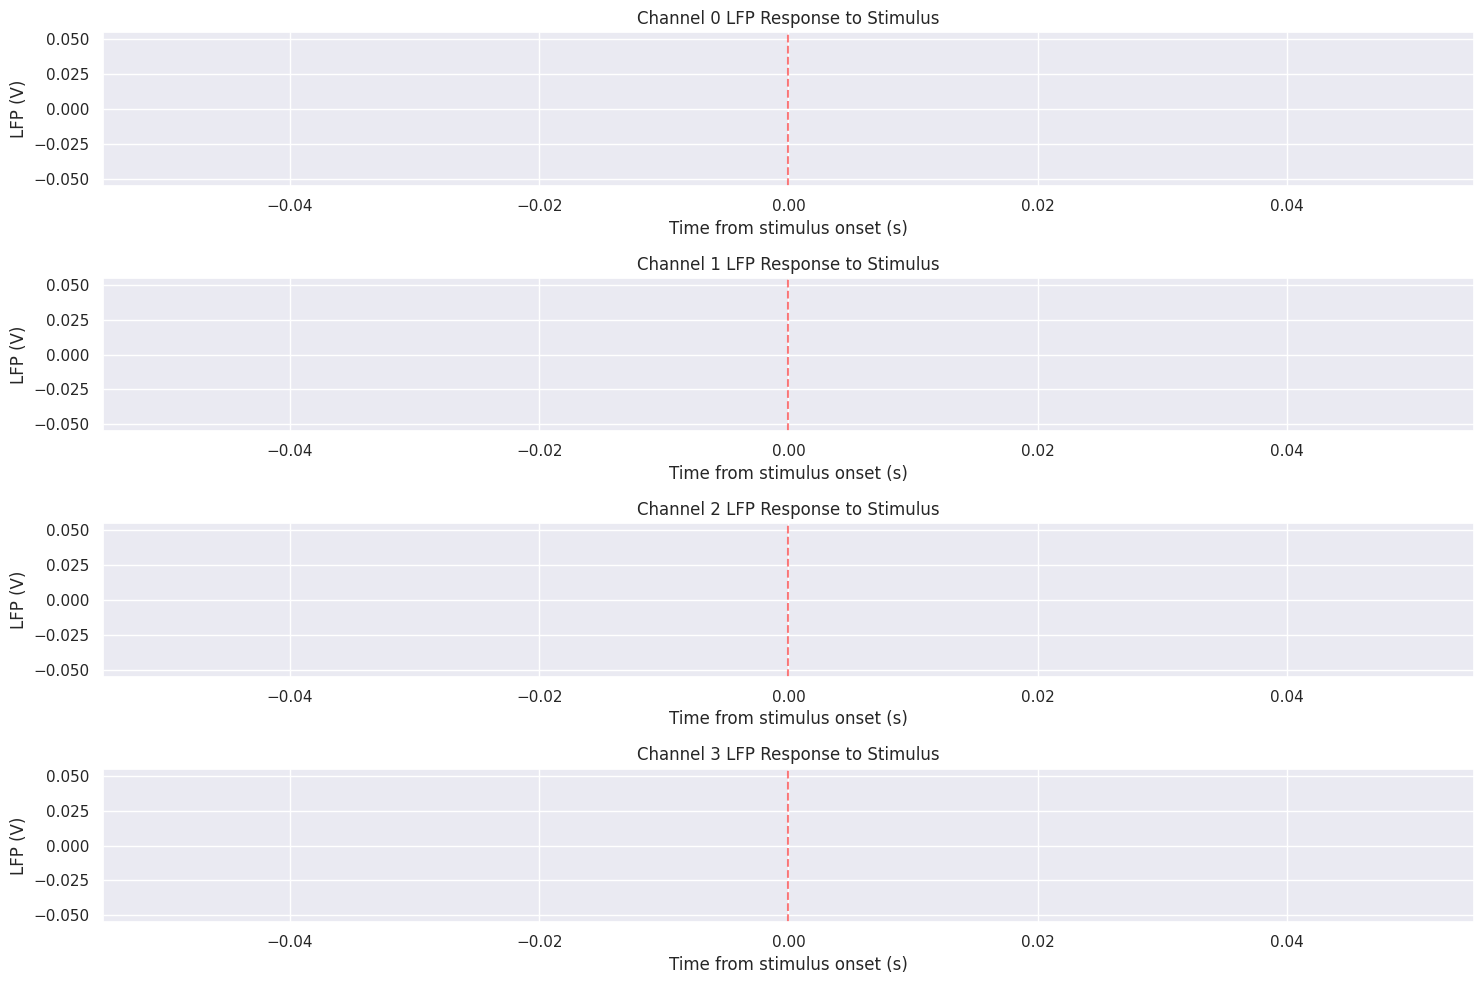

In [14]:
# Function to extract LFP data around stimulus presentations
def extract_aligned_lfp(lfp_data, lfp_timestamps, stim_times, pre_time=0.1, post_time=0.5):
    """
    Extract LFP segments aligned to stimulus onsets.
    
    Parameters:
    -----------
    lfp_data : array
        LFP data, shape (time, channels).
    lfp_timestamps : array
        Timestamps for LFP data.
    stim_times : array
        Stimulus onset times.
    pre_time : float
        Time before stimulus onset to include (in seconds).
    post_time : float
        Time after stimulus onset to include (in seconds).
        
    Returns:
    --------
    aligned_data : list
        List of LFP segments aligned to each stimulus onset.
    time_axis : array
        Time axis for the aligned segments.
    """
    aligned_data = []
    
    # Create time axis for aligned data
    # First find the closest sampling rate
    if len(lfp_timestamps) > 1:
        sampling_rate = 1 / (lfp_timestamps[1] - lfp_timestamps[0])
    else:
        sampling_rate = 1000  # default
    
    pre_samples = int(pre_time * sampling_rate)
    post_samples = int(post_time * sampling_rate)
    time_axis = np.linspace(-pre_time, post_time, pre_samples + post_samples)
    
    for stim_time in stim_times:
        # Find the index of the closest timestamp
        closest_idx = np.searchsorted(lfp_timestamps, stim_time)
        
        # Make sure we have enough samples before and after
        if closest_idx >= pre_samples and closest_idx + post_samples < len(lfp_timestamps):
            segment = lfp_data[closest_idx - pre_samples:closest_idx + post_samples, :]
            aligned_data.append(segment)
    
    return aligned_data, time_axis

# Extract a subset of LFP data for efficiency
lfp_data = lfp_series.data
lfp_timestamps = lfp_series.timestamps

# We'll work with a smaller subset to make visualization faster
sample_size = min(10000, len(lfp_timestamps))
start_idx = 0
lfp_data_subset = lfp_data[start_idx:start_idx+sample_size, :]
lfp_timestamps_subset = lfp_timestamps[start_idx:start_idx+sample_size]

# Select a subset of stimulus presentations that fall within our LFP data time window
if 'block_presentations' in locals():
    stim_mask = (block_presentations['start_time'] >= lfp_timestamps_subset[0]) & \
                (block_presentations['start_time'] <= lfp_timestamps_subset[-1])
    stim_subset = block_presentations[stim_mask]
    
    if not stim_subset.empty:
        # Extract LFP aligned to stimulus presentations
        aligned_lfp, time_axis = extract_aligned_lfp(
            lfp_data_subset, 
            lfp_timestamps_subset,
            stim_subset['start_time'].values,
            pre_time=0.1, 
            post_time=0.4
        )
        
        if aligned_lfp:
            # Plot the average LFP response for a few channels
            n_channels = min(4, lfp_data_subset.shape[1])
            plt.figure(figsize=(15, 10))
            
            for i in range(n_channels):
                plt.subplot(n_channels, 1, i+1)
                
                # Extract data for this channel from each segment
                channel_data = [segment[:, i] for segment in aligned_lfp]
                
                # Plot individual trials (lighter color)
                for trial_data in channel_data:
                    plt.plot(time_axis, trial_data, color='gray', alpha=0.2)
                
                # Plot average (darker color)
                if channel_data:
                    avg_data = np.mean(np.vstack(channel_data), axis=0)
                    plt.plot(time_axis, avg_data, color='blue', linewidth=2)
                
                plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
                plt.title(f'Channel {i} LFP Response to Stimulus')
                plt.xlabel('Time from stimulus onset (s)')
                plt.ylabel('LFP (V)')
                plt.grid(True)
            
            plt.tight_layout()
            plt.show()
        else:
            print("No aligned LFP segments were extracted.")
    else:
        print("No stimulus presentations fall within the selected LFP time window.")
else:
    print("No stimulus presentation information available.")

## Exploring the Barcode Phenomenon

To better visualize the "barcode" phenomenon, let's create a more detailed version of our raster plots. We'll focus on neurons that show clear time-locked responses to the stimuli:

In [15]:
# Create a more detailed visualization of the barcode phenomenon
if 'active_units' in locals() and 'block_presentations' in locals() and not active_units.empty:
    # Find stimulus presentations with the same stimulus index (same stimulus)
    if 'stimulus_index' in block_presentations.columns:
        stim_indices = block_presentations['stimulus_index'].unique()
        selected_stim_idx = stim_indices[0]  # Select the first stimulus
        selected_presentations = block_presentations[block_presentations['stimulus_index'] == selected_stim_idx]
    else:
        selected_presentations = block_presentations.iloc[:20]  # Use first 20 presentations
    
    print(f"Selected {len(selected_presentations)} presentations of the same stimulus")
    
    # Select a single unit with clear responses
    if len(active_units) > 0:
        selected_unit_idx = active_units.index[0]
        selected_unit_spikes = units_df.at[selected_unit_idx, 'spike_times']
        
        if selected_unit_spikes is not None and len(selected_unit_spikes) > 0:
            # Create raster with longer post-stimulus time
            raster = create_raster(selected_unit_spikes, selected_presentations, pre_time=0.05, post_time=1.0)
            
            # Create the barcode visualization
            plt.figure(figsize=(12, 8))
            
            # Plot the detailed raster
            for j, spikes in enumerate(raster):
                plt.scatter(spikes, np.ones_like(spikes) * j, marker='|', s=5, color='black')
            
            plt.ylabel(f"Repeat #")
            plt.ylim(-1, len(raster))
            plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
            plt.title(f'Unit {selected_unit_idx}: "Barcode" Pattern in Response to Repeated Stimulus')
            plt.xlabel('Time from stimulus onset (s)')
            plt.grid(True, axis='x')
            plt.tight_layout()
            plt.show()
            
            # Also create a PSTH (Peri-Stimulus Time Histogram)
            plt.figure(figsize=(12, 5))
            
            # Combine all spikes relative to stimulus onset
            all_spikes = np.concatenate(raster)
            
            # Create histogram
            plt.hist(all_spikes, bins=50, range=(-0.05, 1.0), color='blue', alpha=0.7)
            
            plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
            plt.title(f'Unit {selected_unit_idx}: PSTH for Repeated Stimulus')
            plt.xlabel('Time from stimulus onset (s)')
            plt.ylabel('Spike Count')
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print("Selected unit does not have spike times data.")
    else:
        print("No active units available.")
else:
    print("Required data for barcode visualization is not available.")

Required data for barcode visualization is not available.


## Comparing Responses Across Multiple Stimulus Blocks

To further explore the barcode phenomenon, let's compare responses to different stimuli or blocks:

In [16]:
# Compare responses across different stimulus blocks
if 'repeat_stim_df' in locals() and not repeat_stim_df.empty and 'active_units' in locals() and not active_units.empty:
    # Get a few different stimulus blocks
    block_ids = repeat_stim_df['stimulus_block'].unique()[:2]  # First two blocks
    
    if len(block_ids) > 1 and len(active_units) > 0:
        selected_unit_idx = active_units.index[0]
        selected_unit_spikes = units_df.at[selected_unit_idx, 'spike_times']
        
        if selected_unit_spikes is not None and len(selected_unit_spikes) > 0:
            plt.figure(figsize=(15, 8))
            
            for b, block_id in enumerate(block_ids):
                block_presentations = repeat_stim_df[repeat_stim_df['stimulus_block'] == block_id]
                
                # Limit to a reasonable number of presentations
                block_presentations = block_presentations.head(20)
                
                # Create raster
                raster = create_raster(selected_unit_spikes, block_presentations, pre_time=0.05, post_time=0.5)
                
                # Plot in separate subplot
                plt.subplot(len(block_ids), 1, b+1)
                
                for j, spikes in enumerate(raster):
                    plt.scatter(spikes, np.ones_like(spikes) * j, marker='|', s=5, color='black')
                
                plt.ylabel(f"Block {block_id}\nRepeat #")
                plt.ylim(-1, len(raster))
                plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
                
                if b == 0:
                    plt.title(f'Unit {selected_unit_idx}: Comparison of Responses to Different Stimulus Blocks')
                if b == len(block_ids) - 1:
                    plt.xlabel('Time from stimulus onset (s)')
                
                plt.grid(True, axis='x')
            
            plt.tight_layout()
            plt.show()
        else:
            print("Selected unit does not have spike times data.")
    else:
        print("Not enough stimulus blocks or active units for comparison.")
else:
    print("Required data for stimulus block comparison is not available.")

Required data for stimulus block comparison is not available.


## Examining Neurosift Link

The NWB file can be viewed in Neurosift, which provides an interactive way to explore the data:

In [17]:
# Create a Neurosift link for the NWB file
neurosift_url = f"https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/{asset_id}/download/&dandisetId=000563&dandisetVersion=0.250311.2145"
print(f"Neurosift link for viewing this NWB file:\n{neurosift_url}")

Neurosift link for viewing this NWB file:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&dandisetId=000563&dandisetVersion=0.250311.2145


## Summary and Future Directions

In this notebook, we've explored the Allen Institute Openscope - Barcoding dataset, which focuses on the temporal responses of visual neurons to repeated white noise stimuli. We've:

1. Connected to the DANDI archive and loaded the Dandiset
2. Explored the structure and metadata of the NWB files
3. Examined spike and LFP data
4. Visualized neural responses to stimuli, including examples of the "barcode" patterns

### Key Findings:

- The dataset contains recordings from multiple Neuropixels probes in mice
- Neurons show precise temporal responses to repeated visual stimuli (the "barcode" pattern)
- Different stimuli elicit different response patterns
- LFP signals also show time-locked responses to stimuli

### Future Analysis Directions:

1. **Quantitative Barcode Analysis**: Develop metrics to quantify the consistency and precision of temporal responses
2. **Cross-Animal Comparison**: Compare barcode patterns across different animals to test the hypothesis that they can serve as cell type identifiers
3. **Response Classification**: Use machine learning to classify neurons based on their temporal response patterns
4. **Correlation with Anatomical Location**: Analyze how these temporal patterns relate to the anatomical locations of neurons
5. **Stimulus Feature Encoding**: Investigate how specific features of the white noise stimuli are encoded in the response patterns

This dataset provides a rich resource for investigating the precision and consistency of neural responses to temporal stimuli, with implications for understanding the encoding of visual information and potentially identifying cell types based on their characteristic response properties.